<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/RNA_Clasificaci%C3%B3n_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow --upgrade

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

## Importando el conjunto de datos

In [4]:
from tensorflow.keras import datasets

In [5]:
mnist = datasets.mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

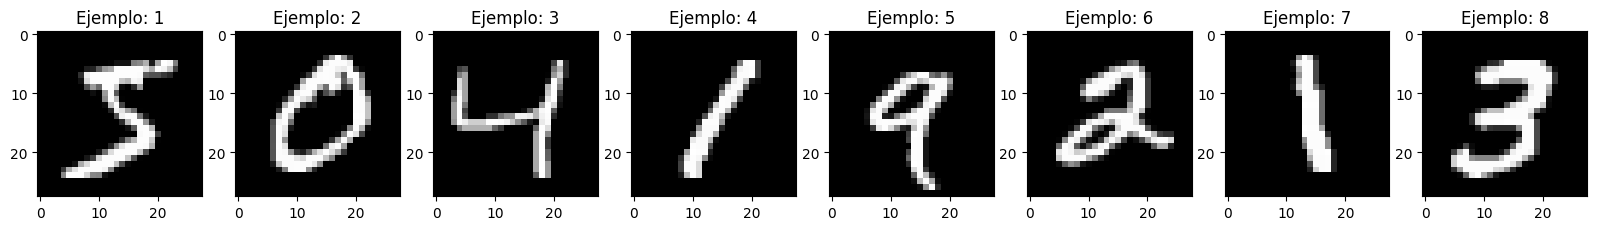

In [8]:
# Visualización de los primeros 8 ejemplos de nuestro conjunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

##2. Definición de la arquitectura de la RNA

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

##3. Configuración de la RNA

In [13]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

##4. Preparación del conjunto de datos

In [14]:
# Preparación de las cartacterísticas de entrada
X_train_prep = X_train.reshape((60000, 28*28))
X_train_pred = X_train_prep.astype('float32') / 255

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32') / 255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32') / 255

In [15]:
# Preparación de las características de salida
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

##5. Entramiento de la RNA

In [16]:
history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs=30,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - Precision: 0.1078 - accuracy: 0.1121 - loss: 10999049216.0000 - val_Precision: 0.0000e+00 - val_accuracy: 0.1160 - val_loss: 2.3008
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - Precision: 0.9227 - accuracy: 0.1135 - loss: 2.3009 - val_Precision: 0.0000e+00 - val_accuracy: 0.1160 - val_loss: 2.3009
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Precision: 0.6940 - accuracy: 0.1124 - loss: 2.3010 - val_Precision: 0.0000e+00 - val_accuracy: 0.1160 - val_loss: 2.3008
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - Precision: 0.8753 - accuracy: 0.1132 - loss: 2.3011 - val_Precision: 0.0000e+00 - val_accuracy: 0.1160 - val_loss: 2.3008
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Precision: 0.6535 - accuracy: 0.1100 - loss: 2.3013 - val_Precision: 0.0000e+00 - val_accuracy: 0.1160 - val_loss: 2.3007
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - Precision: 0.7207 - accuracy: 0.1124 - los

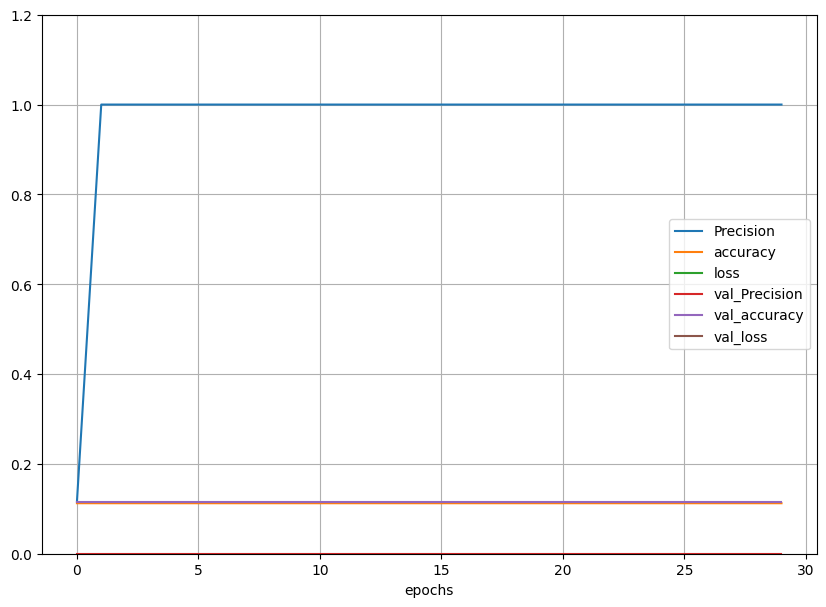

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel('epochs')
plt.show()

##6. Validación con el conjunto de datos de prueba

In [18]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.0000e+00 - accuracy: 0.1076 - loss: 2.3012


In [19]:
print('test_acc', test_acc)
print('test_prec', test_prec)

test_acc 0.11100000143051147
test_prec 0.0


##7. Predicción de nuevos ejemplos

In [ ]:
X_new = X_test[34]